The KPMG/InsideSherpa Virtual Internship involves three tasks:
    1. Data Quality Assessment
    2. Data Insights 
    3. Data Insight and Presentations
    
### Data Quality Assessment
This stage assesses data quality and completeness in line with KPMG's Standard Data Quality Dimension. 

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
import math as ma
%matplotlib inline

Transactions = pd.read_excel(../KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
SprocketCustDem = pd.read_excel(../KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
SprocketCustAdd = pd.read_excel(../KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')

A first view of the data sheets provided by Sprocket in MS Excel shows that the header information are not properly set. Columns headers are fixed as below

In [2]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Using python conditional statements, I checked for consistency and correctness of data

To check for completeness of data, I deployed Python conditional statements and .count() and .notnull() functions. 

In [3]:
SprocketCustDem.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [4]:
A = SprocketCustDem[SprocketCustDem["job_title"].notnull()]
A.count()

customer_id                            3494
first_name                             3494
last_name                              3385
gender                                 3494
past_3_years_bike_related_purchases    3494
DOB                                    3416
job_title                              3494
job_industry_category                  2943
wealth_segment                         3494
deceased_indicator                     3494
default                                3237
owns_car                               3494
tenure                                 3416
dtype: int64

In [5]:
SprocketCustAdd.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

# Identifying Duplicate Values

In [6]:
dups = Transactions.duplicated()
Transactions[dups].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [7]:
SprocketCustAdd.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

### Here is your task
For context, Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration;  Model Development and Interpretation.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

### Data Analysis and Interpretation




In [8]:
#reading new customers data

NewCust = pd.read_excel(../KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')

In [9]:
NewCust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [10]:
NewCust.drop(["Unnamed: 16", "Unnamed: 17", "Unnamed: 18","Unnamed: 19", "Unnamed: 20"], axis = 1, inplace = True)

NewCust.columns = ["first_name", "last_name", "gender","past_3_years_bike_related_purchases",
                   "DOB", "job_title", "job_industry_category", "wealth_segment",
                   "deceased_indicator", "owns_car", "tenure", "address", "postcode",
                   "state", "country", "property_valuation", "Rank", "Value"]

#NewCust.drop(index = 0, inplace = True)

NewCust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [11]:
pd.DataFrame(Transactions.customer_id.value_counts()).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 2183 to 1544
Data columns (total 1 columns):
customer_id    3494 non-null int64
dtypes: int64(1)
memory usage: 54.6 KB


The importance of understanding the transaction history on the basis of customer_id helps to know the maximum number of transaction done by a prolifed customer. The maximum number of transaction a customer did is 14 transactions while some customers did not do any transaction. A profile will then be built to understand the transactions that happen at each region. The total number of customers is 3494. 

Three customers have 14 transactions history. I will briefly check their transactions to understand how valuable it is.

In [12]:
Transactions.loc[Transactions.customer_id==2476].head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4350,4351,21,2476,2017-11-28,1.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,41701.0
6996,6997,0,2476,2017-04-22,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,39880.0
7909,7910,90,2476,2017-10-28,1.0,Approved,Solex,Standard,low,medium,945.04,507.58,35052.0
8004,8005,0,2476,2017-11-17,0.0,Approved,WeareA2B,Standard,medium,small,175.89,131.92,37668.0
8372,8373,88,2476,2017-02-14,0.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0


In [13]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

To understand transactions by brand, I deploy Pandas crossby function.

In [14]:
import pandas as pd 
pd.crosstab(Transactions.brand, Transactions.online_order, margins = True)

online_order,0.0,1.0,All
brand,,,
Giant Bicycles,1604,1640,3244
Norco Bicycles,1446,1417,2863
OHM Cycles,1433,1560,2993
Solex,2122,2047,4169
Trek Bicycles,1471,1460,2931
WeareA2B,1630,1615,3245
All,9706,9739,19445


In [15]:
pd.crosstab(Transactions.brand, Transactions.product_line, margins = True)

product_line,Mountain,Road,Standard,Touring,All
brand,,,,,
Giant Bicycles,0,579,2554,179,3312
Norco Bicycles,200,923,1787,0,2910
OHM Cycles,0,779,2035,229,3043
Solex,0,537,3508,208,4253
Trek Bicycles,223,995,1772,0,2990
WeareA2B,0,157,2520,618,3295
All,423,3970,14176,1234,19803


In [16]:
pd.crosstab(Transactions.brand, Transactions.product_size, margins = True)

product_size,large,medium,small,All
brand,,,,
Giant Bicycles,949,1776,587,3312
Norco Bicycles,410,1736,764,2910
OHM Cycles,195,2648,200,3043
Solex,1091,2977,185,4253
Trek Bicycles,901,1542,547,2990
WeareA2B,430,2311,554,3295
All,3976,12990,2837,19803


In [17]:
pd.crosstab(Transactions.brand, Transactions.product_class, margins = True)

product_class,high,low,medium,All
brand,,,,
Giant Bicycles,785,196,2331,3312
Norco Bicycles,566,632,1712,2910
OHM Cycles,771,609,1663,3043
Solex,566,410,3277,4253
Trek Bicycles,325,786,1879,2990
WeareA2B,0,331,2964,3295
All,3013,2964,13826,19803


### Exploring Customer Demographic

#### Values in the default column  are not correct, we would drop the column

In [18]:
SprocketCustDem.replace({"F":"Female", "M":"Male", 
                         "Femal":"Female", 
                         "MALE":"Male"}, inplace = True)



SprocketCustDem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [19]:
SprocketCustDem.drop(["default"], axis = 1, inplace = True)

In [20]:
SprocketCustDem['DOB'] = pd.to_datetime(SprocketCustDem['DOB'])
SprocketCustDem['year'] = SprocketCustDem['DOB'].dt.year
SprocketCustDem.head(30)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,1966.0
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,1976.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,1962.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988.0


In [21]:
SprocketCustDem['year'].describe()


count    3913.000000
mean     1977.030667
std        12.796387
min      1843.000000
25%      1968.000000
50%      1977.000000
75%      1987.000000
max      2002.000000
Name: year, dtype: float64

In [22]:
SprocketCustDem['year'].mode()

0    1978.0
dtype: float64

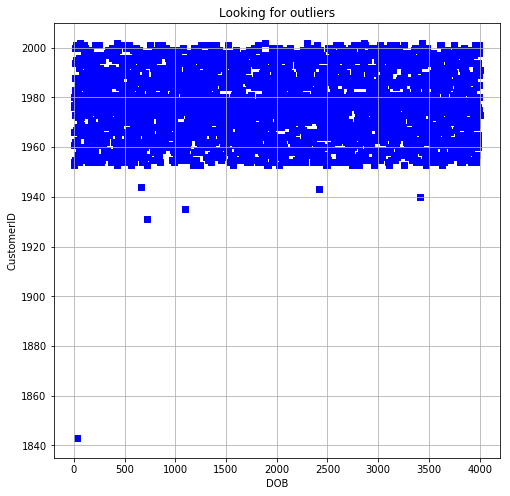

In [23]:

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
plt.scatter(SprocketCustDem.customer_id ,SprocketCustDem.year , c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("DOB") 
plt.ylabel("CustomerID") 
plt.grid()



In [24]:
outliers=SprocketCustDem[SprocketCustDem.year < 1930]
outliers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1843.0


In [25]:
SprocketCustDem.shape

(4000, 13)

In [26]:
SprocketCustDem.year.loc[SprocketCustDem.customer_id==34]=1978



/Users/elnazvafaei/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
#Outlier Double Checking
SprocketCustDem.loc[SprocketCustDem.customer_id==34]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1978.0


In [28]:
outliers=SprocketCustDem[SprocketCustDem.year < 1930]
outliers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year


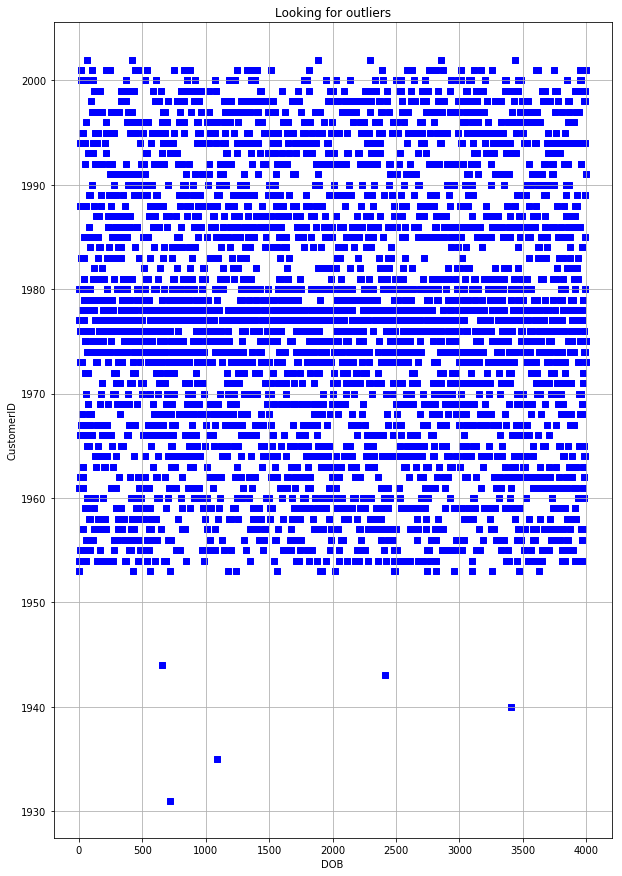

In [29]:

from pylab import rcParams
rcParams['figure.figsize'] = 10, 15
plt.scatter(SprocketCustDem.customer_id ,SprocketCustDem.year , c = "blue", marker = "s")
#plt.figure(figsize=(10,10))
plt.title("Looking for outliers")
plt.xlabel("DOB") 
plt.ylabel("CustomerID") 
plt.grid()
#plt.show()

In [30]:
f_buyers = SprocketCustDem['past_3_years_bike_related_purchases'][SprocketCustDem['gender'] == 'Female'].sum()
m_buyers = SprocketCustDem['past_3_years_bike_related_purchases'][SprocketCustDem['gender'] == 'Male'].sum()
u_buyers = SprocketCustDem['past_3_years_bike_related_purchases'][SprocketCustDem['gender'] == 'U'].sum()
f_buyers ,m_buyers,u_buyers

(98359, 93483, 3718)

In [31]:
f_quant=SprocketCustDem[SprocketCustDem['gender'] == 'Female'].gender.count()
m_quant=SprocketCustDem[SprocketCustDem['gender'] == 'Male'].gender.count()
u_quant=SprocketCustDem[SprocketCustDem['gender'] == 'U'].gender.count()
f_quant , m_quant , u_quant

(2039, 1873, 88)

In [32]:
avg=[0,0,0]
avg[0] = round(f_quant/4000,4) 
avg[1] = round(m_quant/4000,4)
avg[2] = round(u_quant/4000,4)
avg[0], avg[1],avg[2]

(0.5098, 0.4682, 0.022)

In [33]:
avg[0]+ avg[1]+avg[2]

1.0

([<matplotlib.axis.XTick at 0x11a0d6898>,
 <a list of 3 Text xticklabel objects>)

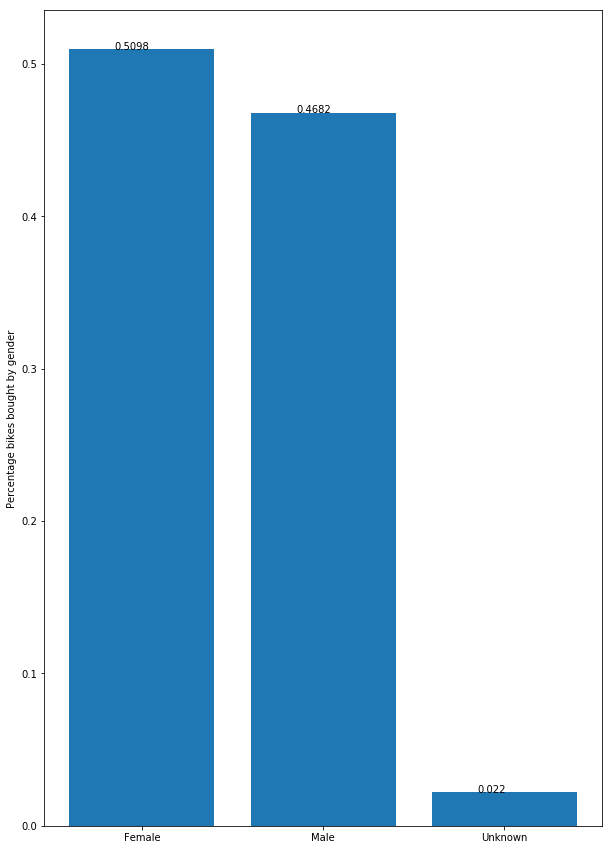

In [34]:
x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [35]:
SprocketCustDem.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year'],
      dtype='object')

In [36]:
SprocketCustDem.shape

(4000, 13)

In [37]:
pd.crosstab(SprocketCustDem.gender, SprocketCustDem.job_industry_category, margins = True)

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,All
gender,,,,,,,,,,
Female,57,67,392,303,79,425,144,184,39,1690
Male,56,69,375,293,72,371,123,174,33,1566
U,0,0,7,6,72,3,0,0,0,88
All,113,136,774,602,223,799,267,358,72,3344


In [38]:
pd.crosstab(SprocketCustDem.gender, SprocketCustDem.wealth_segment, margins = True)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
gender,,,,
Female,481,514,1044,2039
Male,481,482,910,1873
U,17,25,46,88
All,979,1021,2000,4000


In [39]:
pd.crosstab(SprocketCustDem.gender, SprocketCustDem.owns_car, margins = True)

owns_car,No,Yes,All
gender,,,
Female,1012,1027,2039
Male,926,947,1873
U,38,50,88
All,1976,2024,4000


In [40]:
SprocketCustAdd.state.value_counts()

SprocketCustAdd.replace({"New South Wales": "NSW", 
                         "Victoria": "VIC"}, inplace = True)

SprocketCustAdd.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [41]:
SprocketCustAdd.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [42]:
pd.crosstab(SprocketCustAdd.state, SprocketCustDem.gender , margins = True)

gender,Female,Male,U,All
state,,,,
NSW,1101,997,42,2140
QLD,418,404,16,838
VIC,520,471,30,1021
All,2039,1872,88,3999


#### From the above, New South Wales (NSW) has more customers than  other states in the data.

### Exploring New Customer List Dataset

In [43]:
# this is to check for the rows with gender labelled "U"
NewCust.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [44]:
NewCust.loc[NewCust.gender == "U"].count()


first_name                             17
last_name                              17
gender                                 17
past_3_years_bike_related_purchases    17
DOB                                     0
job_title                              16
job_industry_category                  17
wealth_segment                         17
deceased_indicator                     17
owns_car                               17
tenure                                 17
address                                17
postcode                               17
state                                  17
country                                17
property_valuation                     17
Rank                                   17
Value                                  17
dtype: int64

In [45]:
NewCust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [46]:
pd.crosstab(NewCust.gender, NewCust.state, margins = True)

state,NSW,QLD,VIC,All
gender,,,,
Female,250,125,138,513
Male,249,101,120,470
U,7,2,8,17
All,506,228,266,1000


In [47]:

NewCust.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [48]:
pd.crosstab(NewCust.job_industry_category, NewCust.gender, margins = True)

gender,Female,Male,U,All
job_industry_category,,,,
Argiculture,10,16,0,26
Entertainment,20,16,1,37
Financial Services,110,92,1,203
Health,81,71,0,152
IT,18,18,15,51
Manufacturing,97,102,0,199
Property,35,29,0,64
Retail,44,34,0,78
Telecommunications,13,12,0,25


In [49]:
pd.crosstab(NewCust.wealth_segment, NewCust.gender, margins = True)

gender,Female,Male,U,All
wealth_segment,,,,
Affluent Customer,113,122,6,241
High Net Worth,136,113,2,251
Mass Customer,264,235,9,508
All,513,470,17,1000


In [50]:
pd.crosstab(NewCust.state, NewCust.gender, margins = True)

gender,Female,Male,U,All
state,,,,
NSW,250,249,7,506
QLD,125,101,2,228
VIC,138,120,8,266
All,513,470,17,1000


#### From the above, New South Wales (NSW) has more new customers than other states in the data.

The next stage of analysis to apply pandas groupby function to understand further the distribution in the data. Particularly the transaction data. 

In [51]:
Customers_Sale = Transactions.groupby("customer_id")

Trans_By_Cust_ID = pd.DataFrame(Customers_Sale.count())

In [52]:
Customers_Sale = Transactions.groupby("customer_id")

Trans_By_Cust_ID = pd.DataFrame(Customers_Sale.count())

In [53]:
Trans_By_Cust_ID.head()

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
customer_id,,,,,,,,,,,,
1,11,11,11,11,11,11,11,11,11,11,11,11
2,3,3,3,3,3,3,3,3,3,3,3,3
3,8,8,8,7,8,8,8,8,8,8,8,8
4,2,2,2,2,2,2,2,2,2,2,2,2
5,6,6,6,6,6,6,6,6,6,6,6,6


## Merge all customer information from three tables into one table
With the above table, the transaction table can be merged with the customer demographic table and customer address table so, there is one unified table for analysis.  

In [54]:
CustData_Trans = pd.merge(Trans_By_Cust_ID, SprocketCustAdd, 
                              on = "customer_id", how = "left")

CustData_Trans1 = pd.DataFrame(CustData_Trans)

CustData_Trans2 = pd.merge(CustData_Trans1, SprocketCustDem, 
                              on = "customer_id", how = "left")


In [55]:
NewCust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [56]:
CustData_Trans2.shape

(3494, 30)

The new dataframe object for the analysis is a merged CustData_TranHist2. Then the next is to select part of the table that are useful for further analysis.

In [57]:
CustData_Trans4 = pd.DataFrame(CustData_Trans2)

In [58]:
pd.crosstab(CustData_Trans4.state,CustData_Trans4.wealth_segment, margins = True)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
state,,,,
NSW,452,480,934,1866
QLD,189,188,366,743
VIC,210,226,444,880
All,851,894,1744,3489


In [59]:
CustData_Trans4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 3493
Data columns (total 30 columns):
customer_id                            3494 non-null int64
transaction_id                         3494 non-null int64
product_id                             3494 non-null int64
transaction_date                       3494 non-null int64
online_order                           3494 non-null int64
order_status                           3494 non-null int64
brand                                  3494 non-null int64
product_line                           3494 non-null int64
product_class                          3494 non-null int64
product_size                           3494 non-null int64
list_price                             3494 non-null int64
standard_cost                          3494 non-null int64
product_first_sold_date                3494 non-null int64
address                                3489 non-null object
postcode                               3489 non-null float64
state

In [60]:
CustData_Trans4.replace({"NaN": "NSW"}, inplace = True)

In [61]:
CustData_Trans4.isnull().sum()

customer_id                              0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
address                                  5
postcode                                 5
state                                    5
country                                  5
property_valuation                       5
first_name                               1
last_name                              113
gender                                   1
past_3_years_bike_related_purchases      1
DOB                                     77
job_title  

In [62]:
Customer_state = CustData_Trans4.groupby("state")
Customer_Vic = pd.DataFrame(Customer_state.get_group("VIC").sum())
Customer_NSW = pd.DataFrame(Customer_state.get_group("NSW").sum())
Customer_QLD = pd.DataFrame(Customer_state.get_group("QLD").sum())


In [63]:
# This transaction analysis when combines customer demographic and address data
Transaction_Analysis = pd.concat([Customer_Vic, Customer_NSW, Customer_QLD], axis = 1)
Transaction_Analysis.columns = ["VIC", "NSW", "QLD"]

In [64]:
Transaction_Analysis.columns

Index(['VIC', 'NSW', 'QLD'], dtype='object')

In [65]:
Transaction_Analysis.drop(["customer_id", "state","gender", "wealth_segment", "deceased_indicator","owns_car"], inplace = True)

In [66]:
Transaction_Analysis

,VIC,NSW,QLD
transaction_id,5021,10685,4262
product_id,5021,10685,4262
transaction_date,5021,10685,4262
online_order,4940,10485,4184
order_status,5021,10685,4262
brand,4988,10563,4222
product_line,4988,10563,4222
product_class,4988,10563,4222
product_size,4988,10563,4222
list_price,5021,10685,4262


In [67]:
High_Value_Customer_13 = CustData_Trans4[CustData_Trans4.transaction_id > 12]
High_Value_Customer_13, x=High_Value_Customer_13.shape
High_Value_Customer_13

19

In [68]:
High_Value_Customer_10 = CustData_Trans4[CustData_Trans4.transaction_id > 9]
High_Value_Customer_10, x=High_Value_Customer_10.shape
High_Value_Customer_10

219

In [69]:
High_Value_Customer_7 = CustData_Trans4[CustData_Trans4.transaction_id > 6]
High_Value_Customer_7, x=High_Value_Customer_7.shape
High_Value_Customer_7

1213

In [70]:
High_Value_Customer_4 = CustData_Trans4[CustData_Trans4.transaction_id > 4]
High_Value_Customer_4, x=High_Value_Customer_4.shape
High_Value_Customer_4

2383

([<matplotlib.axis.XTick at 0x119b1b4a8>,
 <a list of 4 Text xticklabel objects>)

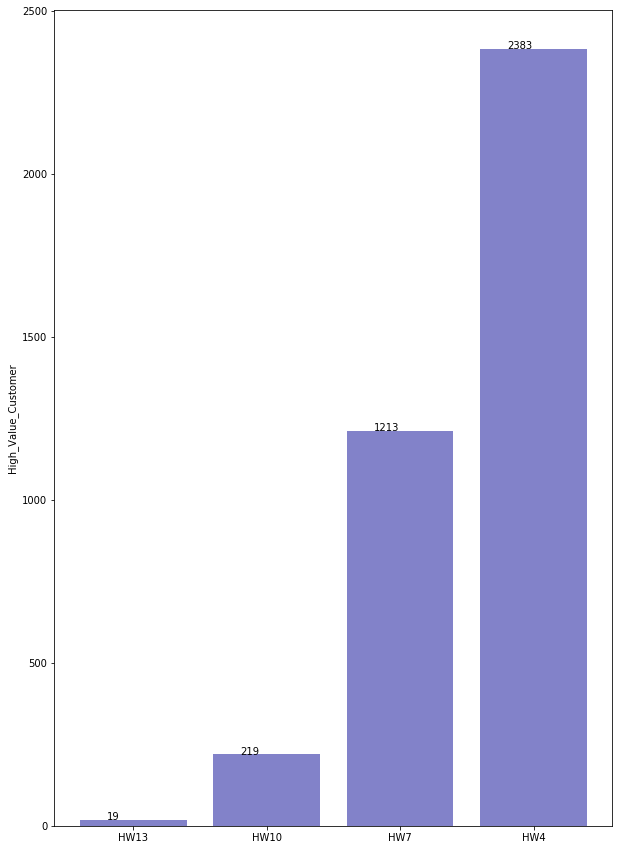

In [71]:
High_Value_Customer = [High_Value_Customer_13, High_Value_Customer_10, High_Value_Customer_7, High_Value_Customer_4]
colorr = (0.3,0.3,0.7,0.7)
x2 = np.arange(4)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('High_Value_Customer')
plt.bar(x2, High_Value_Customer , color = colorr)


for i in range(len(High_Value_Customer )):
    plt.text(x = i-0.2, y = High_Value_Customer[i]+0.1, s = High_Value_Customer[i], size = 10 )
   

plt.xticks(x2, ('HW13', "HW10", 'HW7', "HW4"))

In [72]:
CustData_Trans_Final=CustData_Trans2
CustData_Trans_Final.head()

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
0,1,11,11,11,11,11,11,11,11,11,...,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0
1,2,3,3,3,3,3,3,3,3,3,...,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0
2,3,8,8,8,7,8,8,8,8,8,...,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0
3,4,2,2,2,2,2,2,2,2,2,...,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0
4,5,6,6,6,6,6,6,6,6,6,...,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0


In [73]:
NewCust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [74]:
CustData_Trans_Final.columns


Index(['customer_id', 'transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year'],
      dtype='object')

In [75]:
#SprocketCustDem.year.loc[SprocketCustDem.customer_id==34]=1978
CustData_Trans_Final.year.loc[CustData_Trans_Final.year.isnull()]=1978
CustData_Trans_Final["year"].isnull().sum()

/Users/elnazvafaei/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [76]:
CustData_Trans_Final["Age"] = 2019 - CustData_Trans_Final['year']

In [77]:
CustData_Trans_Final.head()

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,Age
0,1,11,11,11,11,11,11,11,11,11,...,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,66.0
1,2,3,3,3,3,3,3,3,3,3,...,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,39.0
2,3,8,8,8,7,8,8,8,8,8,...,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0,65.0
3,4,2,2,2,2,2,2,2,2,2,...,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961.0,58.0
4,5,6,6,6,6,6,6,6,6,6,...,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0,42.0


In [78]:
CustData_Trans_Final.Age.value_counts().head(20)

41.0    265
42.0    181
45.0    135
43.0    134
39.0    114
46.0    108
40.0    107
33.0     99
44.0     97
24.0     87
60.0     87
34.0     80
55.0     77
48.0     73
21.0     71
50.0     70
38.0     69
30.0     68
52.0     67
31.0     66
Name: Age, dtype: int64

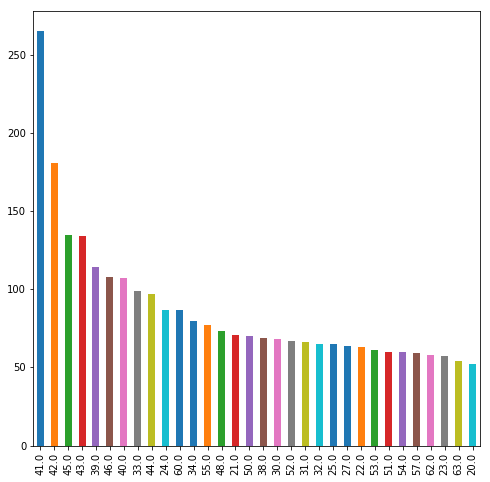

In [79]:

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
CustData_Trans_Final.Age.value_counts()[:20].plot(kind='bar')


In [80]:
fgender=["Female"]
mask1= CustData_Trans_Final['Age']<30

mask11=CustData_Trans_Final.gender.isin(fgender)
fg1_Buyers, x =CustData_Trans_Final[mask11 & mask1].shape
fg1_Buyers

330

In [81]:
fgender=["Female"]
mask3= CustData_Trans_Final['Age'] < 46 
mask2 =  CustData_Trans_Final['Age']>= 30
mask11=CustData_Trans_Final.gender.isin(fgender)
fg2_Buyers,x=CustData_Trans_Final[mask3 & mask2 & mask11].shape
fg2_Buyers

777

In [82]:
fgender=["Female"]
mask5= CustData_Trans_Final['Age'] < 60
mask4 =  CustData_Trans_Final['Age']>= 46
mask11=CustData_Trans_Final.gender.isin(fgender)
fg3_Buyers,x=CustData_Trans_Final[mask4 & mask5 & mask11].shape
fg3_Buyers

469

In [83]:
fgender=["Female"]
mask6= CustData_Trans_Final['Age'] >= 60 

mask11=CustData_Trans_Final.gender.isin(fgender)
fg4_Buyers,x =CustData_Trans_Final[mask6 & mask11].shape
fg4_Buyers

184

In [84]:
mgender=["Male"]
mask1= CustData_Trans_Final['Age']<30

mask22=CustData_Trans_Final.gender.isin(mgender)
mg1_Buyers, x =CustData_Trans_Final[mask1 & mask22].shape
mg1_Buyers

339

In [85]:
mgender=["Male"]
mask3= CustData_Trans_Final['Age'] < 46 
mask2 =  CustData_Trans_Final['Age']>= 30
mask22=CustData_Trans_Final.gender.isin(mgender)
mg2_Buyers,x=CustData_Trans_Final[mask3 & mask2 & mask22].shape
mg2_Buyers

729

In [86]:
mgender=["Male"]
mask5= CustData_Trans_Final['Age'] < 60
mask4 =  CustData_Trans_Final['Age']>= 46
mask22=CustData_Trans_Final.gender.isin(mgender)
mg3_Buyers,x=CustData_Trans_Final[mask4 & mask22 & mask5].shape
mg3_Buyers

402

In [87]:
mgender=["Male"]
mask6= CustData_Trans_Final['Age'] >=60

mask22=CustData_Trans_Final.gender.isin(mgender)
mg4_Buyers,x =CustData_Trans_Final[mask22 & mask6].shape
mg4_Buyers

186

In [88]:
CustData_Trans_Final.Age.describe()

count    3494.000000
mean       41.809101
std        12.445445
min        17.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        88.000000
Name: Age, dtype: float64

([<matplotlib.axis.XTick at 0x11a0cac18>,
 <a list of 8 Text xticklabel objects>)

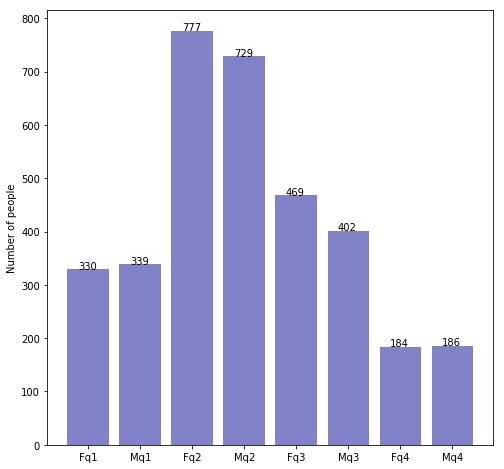

In [89]:
graph_gender = [fg1_Buyers, mg1_Buyers, fg2_Buyers, mg2_Buyers, fg3_Buyers,mg3_Buyers,fg4_Buyers,mg4_Buyers]
colorr = (0.3,0.3,0.7,0.7)
x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graph_gender, color = colorr)


for i in range(len(graph_gender)):
    plt.text(x = i-0.2, y = graph_gender[i]+0.1, s = graph_gender[i], size = 10 )
   

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))

In [90]:
CustData_Trans_Final["job_industry_category"].value_counts()

Manufacturing         703
Financial Services    687
Health                532
Retail                304
Property              231
IT                    189
Entertainment         123
Argiculture           100
Telecommunications     63
Name: job_industry_category, dtype: int64

([<matplotlib.axis.XTick at 0x1196ee0f0>,
 <a list of 9 Text xticklabel objects>)

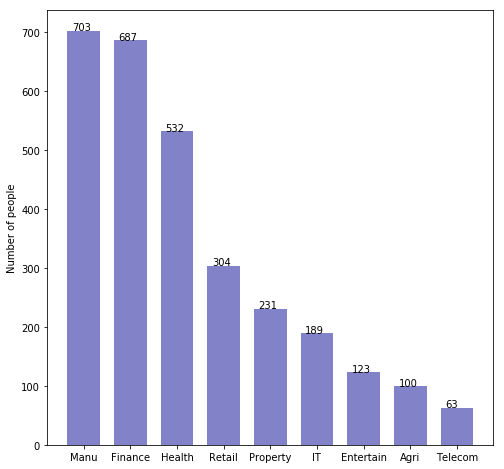

In [91]:
val = [703, 687, 532, 304, 231, 189, 123, 100, 63]

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.7)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

In [93]:
Customers_Sale = Transactions.groupby("customer_id")

Trans_By_Cust_ID = pd.DataFrame(Customers_Sale.count())
Transactions.loc[Transactions.customer_id==2476].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4350,4351,21,2476,2017-11-28,1.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,41701.0
6996,6997,0,2476,2017-04-22,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,39880.0
7909,7910,90,2476,2017-10-28,1.0,Approved,Solex,Standard,low,medium,945.04,507.58,35052.0
8004,8005,0,2476,2017-11-17,0.0,Approved,WeareA2B,Standard,medium,small,175.89,131.92,37668.0
8372,8373,88,2476,2017-02-14,0.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0


In [94]:
CustData_Trans_Final.columns

Index(['customer_id', 'transaction_id', 'product_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year', 'Age'],
      dtype='object')

In [95]:
CustData_Trans_Final.state.isnull().sum()

5

In [96]:
CustData_Trans_Final["state"].fillna("NSW", inplace = True) 

In [97]:
CustData_Trans_Final.state.isnull().sum()

0

In [98]:
NSWCAR=CustData_Trans_Final.loc[CustData_Trans_Final.state=='NSW']
VICCAR=CustData_Trans_Final.loc[CustData_Trans_Final.state=='VIC']
QLDCAR=CustData_Trans_Final.loc[CustData_Trans_Final.state=='QLD']
NSWCAR.head()

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,Age
0,1,11,11,11,11,11,11,11,11,11,...,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953.0,66.0
1,2,3,3,3,3,3,3,3,3,3,...,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980.0,39.0
2,3,8,8,8,7,8,8,8,8,8,...,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954.0,65.0
4,5,6,6,6,6,6,6,6,6,6,...,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977.0,42.0
6,7,3,3,3,3,3,3,3,3,3,...,6.0,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,1976.0,43.0


In [99]:
CustData_Trans_Final.state.unique()


array(['NSW', 'QLD', 'VIC'], dtype=object)

In [100]:
NSWCAR_YES, x=NSWCAR.loc[NSWCAR.owns_car=='Yes'].shape
NSWCAR_NO, x=NSWCAR.loc[NSWCAR.owns_car=='No'].shape
NSWCAR_YES, NSWCAR_NO

(962, 908)

In [101]:
VICCAR_YES, x=VICCAR.loc[VICCAR.owns_car=='Yes'].shape
VICCAR_NO, x=VICCAR.loc[VICCAR.owns_car=='No'].shape
VICCAR_YES, VICCAR_NO

(437, 443)

In [102]:
QLDCAR_YES, x=QLDCAR.loc[QLDCAR.owns_car=='Yes'].shape
QLDCAR_NO, x=QLDCAR.loc[QLDCAR.owns_car=='No'].shape
QLDCAR_YES, QLDCAR_NO

(371, 372)

([<matplotlib.axis.XTick at 0x119bd7a20>,
 <a list of 6 Text xticklabel objects>)

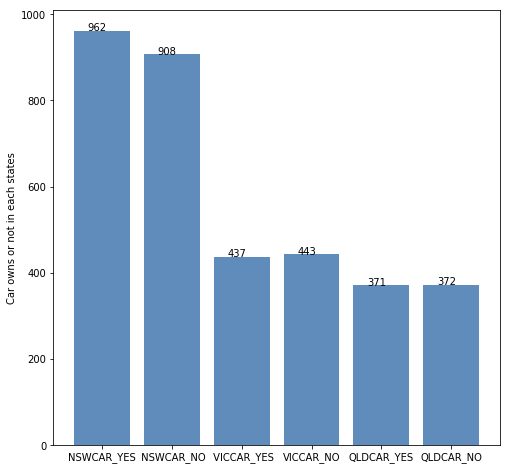

In [103]:

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
graphgen = [NSWCAR_YES, NSWCAR_NO, VICCAR_YES, VICCAR_NO, QLDCAR_YES, QLDCAR_NO]
colorr = (0.3,0.5,0.7,0.9)

x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Car owns or not in each states')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('NSWCAR_YES',' NSWCAR_NO',' VICCAR_YES', 'VICCAR_NO', 'QLDCAR_YES', 'QLDCAR_NO'))

### Important chart for visualization.